In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.metrics import classification_report
#Import data
har=pd.read_csv("C:/MSBA Sem 2/IDS 575/Final_project/Datasets/train.csv")
independent=har.drop(["Activity","subject"],axis=1)
independent


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [2]:
#Finding attributes with high correlation and removing them.
corr_matrix=independent.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.70)]
len(to_drop)

X_train=independent.drop(independent[to_drop],axis=1)
Y_train=pd.DataFrame(har[['Activity']])

In [3]:
#Categorizing our dependent variable
replace_map = {'Activity': {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3,
                                  'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}} 
labels = Y_train['Activity'].astype('category').cat.categories.tolist()
replace_map_comp = {'Activity' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

Y_train.replace(replace_map_comp, inplace=True)

In [4]:
#Importing Test data
test=pd.read_csv("C:/MSBA Sem 2/IDS 575/Final_project/Datasets/test.csv")
independent_test=test.drop(["Activity","subject"],axis=1)

X_test=independent_test.drop(independent_test[to_drop],axis=1)

In [5]:
#Categorizing the test attribute
Y_test=pd.DataFrame(test[['Activity']])
replace_map = {'Activity': {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3,
                                  'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}} 
labels = Y_test['Activity'].astype('category').cat.categories.tolist()
replace_map_comp = {'Activity' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)
Y_test.replace(replace_map_comp, inplace=True)

{'Activity': {'LAYING': 1, 'SITTING': 2, 'STANDING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}}


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class = 'multinomial')
classifier.fit(X_train, Y_train)

c:\users\sanghamitra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\sanghamitra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Confusion Matrix:
Train_accuracy for LR =  0.971164309031556


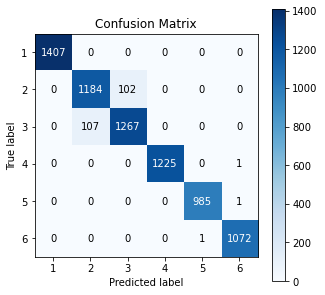

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
#Training Accuracy
train_pred=classifier.predict(X_train)
cm_train1=confusion_matrix(Y_train,train_pred)
train_accuracy_score=accuracy_score(Y_train,train_pred)
print("Training Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(Y_train, train_pred, figsize=(5, 5))
print ("Train_accuracy for LR = ", train_accuracy_score)

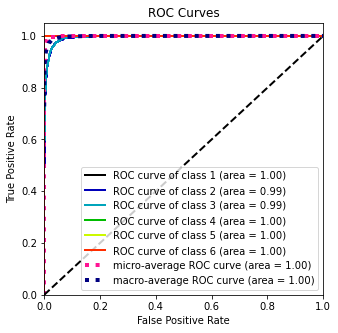

In [9]:
# Plot ROC Curve for Training
Y_probas_train = classifier.predict_proba(X_train)
skplt.metrics.plot_roc(Y_train, Y_probas_train, figsize=(5, 5))

Testing Confusion Matrix:
Test_accuracy for LR =  0.9243298269426535


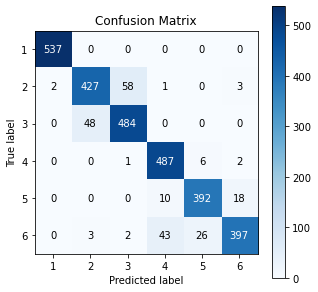

In [10]:
#Testing Accuracy 
test_pred=classifier.predict(X_test)
cm_test1=confusion_matrix(Y_test,test_pred)
test_accuracy_score=accuracy_score(Y_test,test_pred)
print("Testing Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(Y_test, test_pred, figsize=(5, 5))
print ("Test_accuracy for LR = ", test_accuracy_score)

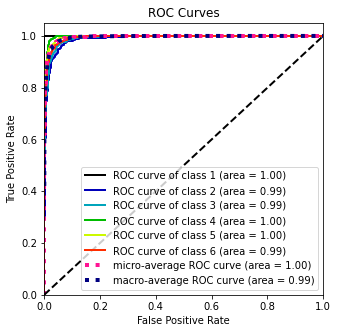

In [11]:
# Plot ROC Curve for Testing
Y_probas_test = classifier.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, Y_probas_test, figsize=(5, 5))

In [12]:
#Classification report
print("Report on train set:\n", classification_report(Y_train, train_pred))
print("Report on test set:\n", classification_report(Y_test, test_pred))

Report on train set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1407
           2       0.92      0.92      0.92      1286
           3       0.93      0.92      0.92      1374
           4       1.00      1.00      1.00      1226
           5       1.00      1.00      1.00       986
           6       1.00      1.00      1.00      1073

    accuracy                           0.97      7352
   macro avg       0.97      0.97      0.97      7352
weighted avg       0.97      0.97      0.97      7352

Report on test set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       537
           2       0.89      0.87      0.88       491
           3       0.89      0.91      0.90       532
           4       0.90      0.98      0.94       496
           5       0.92      0.93      0.93       420
           6       0.95      0.84      0.89       471

    accuracy                      